# 🎵 CQT 시각화하기


In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# 한글 폰트 설정 (깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 1. 데이터 하나 불러오기
전처리된 데이터 중 하나를 골라서 불러옵니다.

In [ ]:
# 데이터 폴더 경로
DATA_DIR = "../data/processed"

target_chord = "C_maj"
chord_dir = os.path.join(DATA_DIR, target_chord)

if os.path.exists(chord_dir):
    files = [f for f in os.listdir(chord_dir) if f.endswith('.wav')]
    if files:
        sample_file = os.path.join(chord_dir, files[0])
        print(f"분석할 파일: {sample_file}")
        
        # 오디오 로드
        y, sr = librosa.load(sample_file, sr=22050)
    else:
        print("파일이 없습니다! 전처리가 아직 안 끝났나요?")
else:
    print(f"{target_chord} 폴더가 없습니다. 경로를 확인해주세요.")

분석할 파일: ../data/processed\C_maj\ableton_live_guitar_Campfire_slice_008.wav


### 2. CQT 변환 수행
`librosa.cqt` 함수를 사용해서 소리를 이미지로 바꿉니다.

In [5]:
# CQT 파라미터 설정
hop_length = 512  # 얼마나 자주 분석할지 (작을수록 시간 해상도가 높음)
n_bins = 84       # 분석할 주파수 개수 (12음계 * 7옥타브 = 84)
bins_per_octave = 12 # 한 옥타브당 몇 개로 나눌지 (12음계)

# CQT 계산
C = librosa.cqt(y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, hop_length=hop_length)

# 복소수 결과를 데시벨(dB) 단위로 변환 (눈으로 보기 좋게)
C_db = librosa.amplitude_to_db(np.abs(C), ref=np.max)

### 3. 시각화 


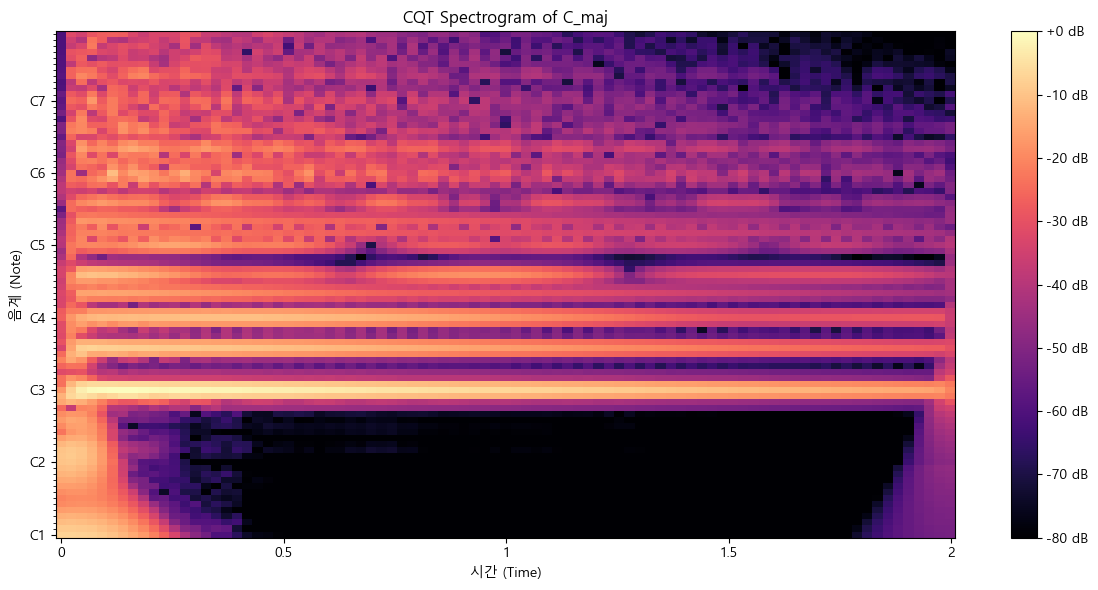

In [ ]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(C_db, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title(f'CQT Spectrogram of {target_chord}')
plt.xlabel('시간 (Time)')
plt.ylabel('음계 (Note)')
plt.tight_layout()
plt.show()